# Supervised Regression with Multiple Variables
<hr>

## 0. Import library
<ht>

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

## 1. Load dataset
<hr>

Load a set of data points $\{ (x_i, y_i, z_i) \}_{i=1}^n$ where $x_i$ and $y_i$ are considered as an input and $z_i$ is considered as an output for $i$-th data point.

In [2]:
# import data with numpy
data_clean = np.genfromtxt('data_clean.txt', delimiter=',')
data_noisy = np.genfromtxt('data_noisy.txt', delimiter=',')

data_clean = data_clean[:,0:3]  # do not change it
data_noisy = data_noisy[:,0:3]  # do not change it

# number of training data
n_clean = len(data_clean)
n_noisy = len(data_noisy)

print("Number of clean data = ",  n_clean)
print("Number of noisy daya = ", n_noisy)
print("Size of clean data = ", data_clean.shape)
print("Type of clean data = ", data_clean.dtype)
print("Size of noisy data = " , data_noisy.shape)
print("Type of noisy data = " , data_noisy.dtype)

Number of clean data =  3600
Number of noisy daya =  3600
Size of clean data =  (3600, 3)
Type of clean data =  float64
Size of noisy data =  (3600, 3)
Type of noisy data =  float64


## 2. Explore the dataset distribution
<hr>

Plot the training data points in 3D cartesian coordinate system.
(You may use matplotlib function `scatter3D()`.)

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


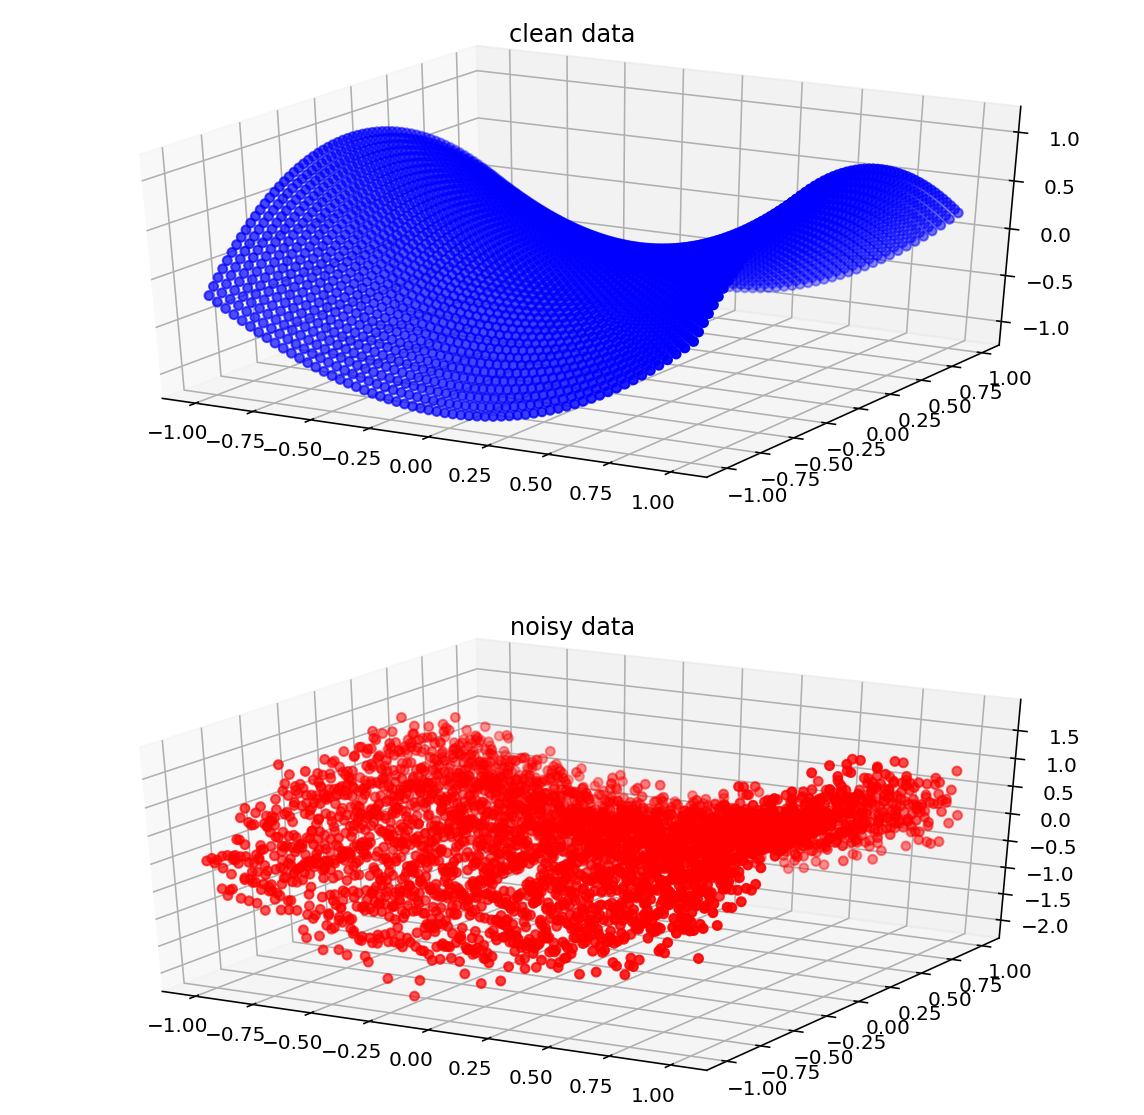

In [3]:
x_clean = data_clean[:,0]
y_clean = data_clean[:,1]
z_clean = data_clean[:,2]

x_train = data_noisy[:,0]
y_train = data_noisy[:,1]
z_train = data_noisy[:,2]

#plot 3d cartesian
graph = plt.figure(figsize=(10, 10))
clean = graph.add_subplot(211, projection ='3d')
train = graph.add_subplot(212, projection = '3d')
clean.set_title("clean data")
train.set_title("noisy data")

clean.scatter3D(x_clean, y_clean, z_clean, color = 'b')
train.scatter3D(x_train, y_train, z_train, color = 'r')
graph.show()


## 3. Define the prediction function 
<hr>
$$
f_w(x, y) = w_0 f_0(x, y) + w_1 f_1(x, y) + w_2 f_2(x, y) + w_3 f_3(x, y) + w_4 f_4(x, y) + w_5 f_5(x, y) + w_6 f_6(x, y) + w_7 f_7(x, y) + w_8 f_8(x, y) + w_9 f_9(x, y)
$$

where feature function $f$ is defined as follows:

$$
\begin{align*}
    f_0(x, y) &= \\
    f_1(x, y) &= \\
    f_2(x, y) &= \\
    f_3(x, y) &= \\
    f_4(x, y) &= \\
    f_5(x, y) &= \\
    f_6(x, y) &= \\
    f_7(x, y) &= \\
    f_8(x, y) &= \\
    f_9(x, y) &= 
\end{align*}
$$

### Vectorized implementation:

$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
f_0(x_1, y_1) & f_1(x_1, y_1) & f_2(x_1, y_1) & f_3(x_1, y_1) & f_4(x_1, y_1) & f_5(x_1, y_1) & f_6(x_1, y_1) & f_7(x_1, y_1) & f_8(x_1, y_1) & f_9(x_1, y_1) \\
f_0(x_2, y_2) & f_1(x_2, y_2) & f_2(x_2, y_2) & f_3(x_2, y_2) & f_4(x_2, y_2) & f_5(x_2, y_2) & f_6(x_2, y_2) & f_7(x_2, y_2) & f_8(x_2, y_2) & f_9(x_2, y_2) \\
\vdots\\
f_0(x_n, y_n) & f_1(x_n, y_n) & f_2(x_n, y_n) & f_3(x_n, y_n) & f_4(x_n, y_n) & f_5(x_n, y_n) & f_6(x_n, y_n) & f_7(x_n, y_n) & f_8(x_n, y_n) & f_9(x_n, y_n)
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\
w_7 \\
w_8 \\
w_9
\end{array} 
\right]
$$

Implement the vectorized version of the predictive function. <br>

In [4]:
# construct data matrix

n = data_noisy.shape[0]
X = np.ones([n,10]) 

X[:,1] = x_clean
X[:,2] = x_clean**2
X[:,3] = x_clean**3
X[:,4] = y_clean 
X[:,5] = y_clean**2
X[:,6] = y_clean**3
X[:,7] = x_clean * y_clean
X[:,8] = (x_clean**2)*(y_clean**2)
X[:,9] = (x_clean**3)*(y_clean**3)

print(X.shape)

# parameters vector
w = np.array([1,1,1,1,1,1,1,1,1,1])[:,None] # [:,None] adds a singleton dimension

# predictive function definition
def f_pred(X,w): 
    
    f = X.dot(w)
    
    return f 

# Test predicitive function 
z_pred = f_pred(X,w)

(3600, 10)


## 4. Define the regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i, y_i) – z_i \Big)^2
$$

### Vectorized implementation:

$$
L(w)=\frac{1}{n} (Xw-z)^T(Xw-z)
$$
with 
<br>
$$
Xw=
\left[ 
\begin{array}{cccc}
f_w(x_1, y_1) \\ 
f_w(x_2, y_2) \\ 
\vdots\\
f_w(x_n, y_n) \\ 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
z = 
\left[ 
\begin{array}{cccc}
z_1 \\ 
z_2 \\ 
\vdots\\
z_n
\end{array} 
\right]
$$

Implement the vectorized version of the regression loss function. <br>


In [5]:
# loss function definition
def loss_mse(z_pred,z): 
    
    n = 1 / z_pred.shape[0]
    
    loss = ((z_pred - z).T).dot(z_pred- z) * n
    
    return loss


# Test loss function 
z = z_clean.reshape(-1, 1)# label
z_pred = f_pred(X, w) # prediction

loss = loss_mse(z_pred,z)

## 5. Define the gradient of the regression loss 
<hr>

$\bullet$ Vectorized implementation: Given the loss

$$
L(w)=\frac{1}{n} (Xw-z)^T(Xw-z)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-z)
$$


Implement the vectorized version of the gradient of the regression loss function.

In [6]:
# gradient function definition
def grad_loss(z_pred,z,X):

    n = 1 / z_pred.shape[0]

    grad = (X.T).dot(z_pred - z) * 2 * n
    
    return grad


# Test grad function 
z_pred = f_pred(X, w)
grad = grad_loss(z_pred,z,X)

## 6. Implement the gradient descent algorithm 
<hr>

### Vectorized implementation: 

$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-z)
$$

Implement the vectorized version of the gradient descent function.

Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.5822641849517822
0.008276008591048342
[-0.0122405  -0.04893309  0.81209104  0.17493308  0.13714129 -0.91736296
 -0.10958816 -0.06492033  0.36627499  0.33165023]


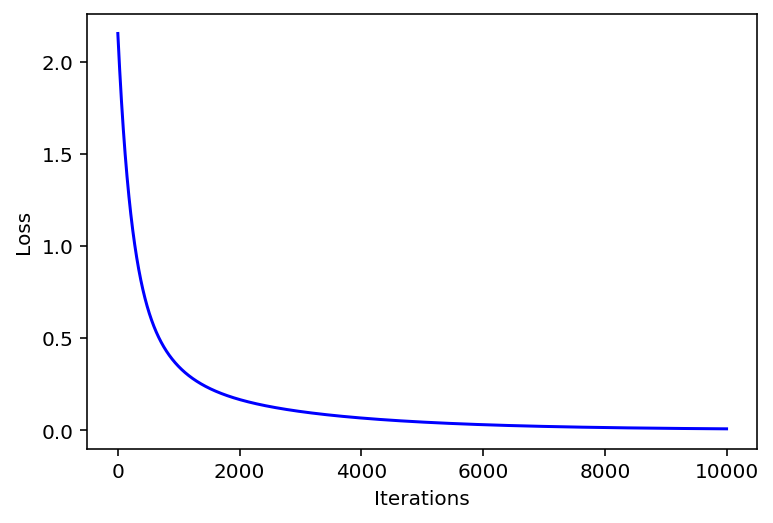

In [7]:
# gradient descent function definition
def grad_desc(X, z , w_init=np.array([0,0])[:,None] ,tau=0.01, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,10]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        z_pred = f_pred(X, w)# linear predicition function 
        grad_f = grad_loss(z_pred, z, X)# gradient of the loss 
        w = w - tau * grad_f # update rule of gradient descent
        L_iters[i] = loss_mse(z_pred, z) # save the current loss value 
        w_iters[i,:] = w[:,0] # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = np.random.rand(10, 1)
tau = 0.001
max_iter = 10000

w, L_iters, w_iters = grad_desc(X,z,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[-1] ) # plot the last value of the loss
print(w_iters[-1] ) # plot the last value of the parameter w 


# plot
plt.figure(2)
plt.plot(L_iters, color = 'b') # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the prediction function
<hr>
$$
f_w(x, y) = w_0 f_0(x, y) + w_1 f_1(x, y) + w_2 f_2(x, y) + w_3 f_3(x, y) + w_4 f_4(x, y) + w_5 f_5(x, y) + w_6 f_6(x, y) + w_7 f_7(x, y) + w_8 f_8(x, y) + w_9 f_9(x, y)
$$

(You may use numpy function `meshgrid` and `plot_surface` for plot the linear prediction function.)

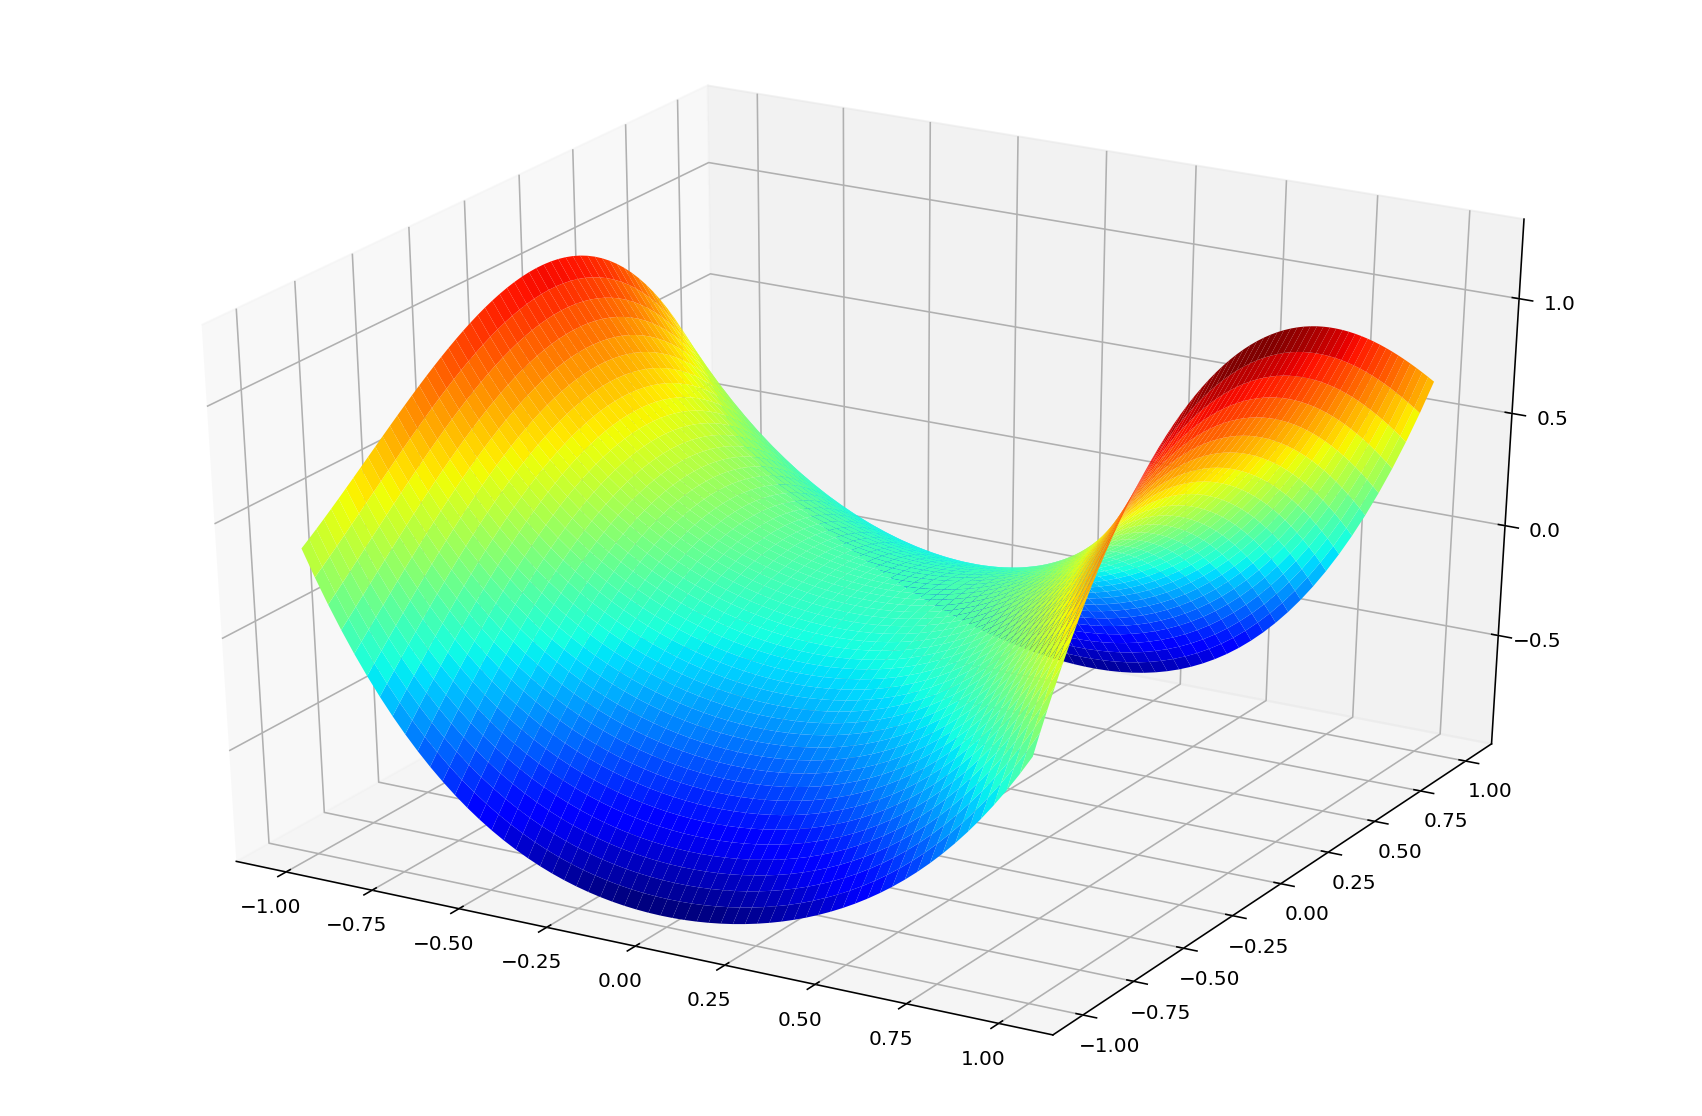

In [8]:
x_coordinate = np.linspace(-1, 1, 60) 
y_coordinate = np.linspace(-1, 1, 60) 

x_pred, y_pred = np.meshgrid(x_coordinate, y_coordinate, indexing='xy')
z_pred = np.zeros((x_coordinate.shape[0], y_coordinate.shape[0]))


w, L_iters, w_iters = grad_desc(X,z, w_init, tau, max_iter)

for(i, j), v in np.ndenumerate(z_pred):
    x = x_pred[i][j]
    y = y_pred[i][j]
    x_ = np.array([1, x, x**2, x**3, y, y**2, y**3, x*y, (x**2)*(x**2), (x**3)*(y**3)])
    z_pred[i, j] = f_pred(x_,w)
    


# plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x_pred, y_pred, z_pred, rstride = 1, cstride = 1, alpha=1, cmap = plt.cm.jet)
plt.show()

## 8. Plot the prediction function superimposed on the training data
<hr>

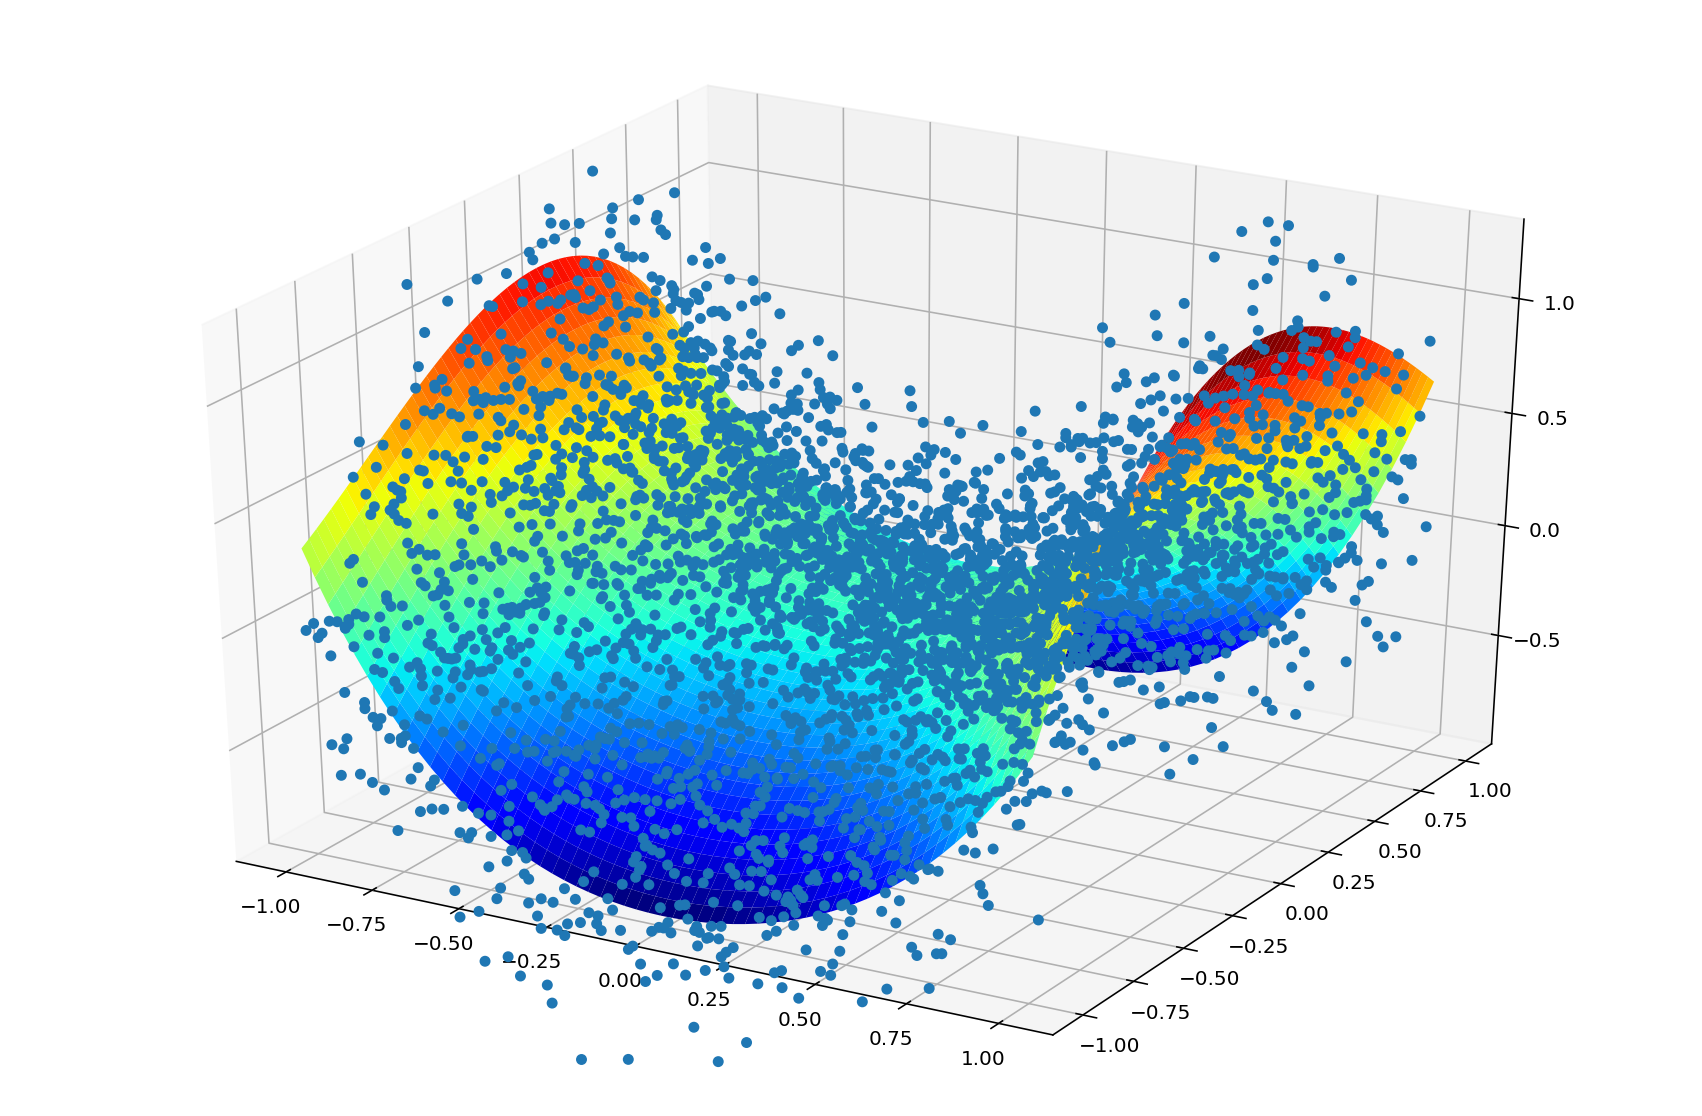

In [9]:
x_coordinate = np.linspace(-1, 1, 60) 
y_coordinate = np.linspace(-1, 1, 60) 

x_pred, y_pred = np.meshgrid(x_coordinate, y_coordinate, indexing='xy')
z_pred = np.zeros((x_coordinate.shape[0], y_coordinate.shape[0]))


w, L_iters, w_iters = grad_desc(X,z, w_init, tau, max_iter)

for(i, j), v in np.ndenumerate(z_pred):
    x = x_pred[i][j]
    y = y_pred[i][j]
    x_ = np.array([1, x, x**2, x**3, y, y**2, y**3, x*y, (x**2)*(x**2), (x**3)*(y**3)])
    z_pred[i, j] = f_pred(x_,w)
    
# plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x_pred, y_pred, z_pred, rstride = 1, cstride = 1, alpha=1, cmap = plt.cm.jet)
ax.scatter(x_train, y_train, z_train, alpha = 1)
ax.set_zlim(z_pred.min(),z_pred.max())
plt.show()